# UNIVERSIDAD POLITÉCNICA SALESIANA

## Nombre: David Egas

### Desarrollo

Realizar un modelo de regresión lineal para determinar los futuros casos de Coronavirus en Ecuador, tomando en cuenta un dataset que contienen los datos históricos de contagiados en diferentes partes del mundo incluido Ecuador, y las fechas desde el día 0 en el país hasta el mes de noviembre de 2020. 

In [47]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

# Infectados

### Dataset utilizado: este dataset esta tomando de la página web Ourl World in Data.

In [48]:
# Carga del dataset
dataset = pd.read_csv('datacovid.csv')
dataset


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,NaN,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,NaN,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54385,NaN,NaN,International,2020-10-30,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54386,NaN,NaN,International,2020-10-31,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54387,NaN,NaN,International,2020-11-01,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54388,NaN,NaN,International,2020-11-02,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Seleccionamiento:

Se toman los valores solo para Ecuador, desde la primera fecha hasta la última y el número de casos encontrados.

In [49]:
dataset = dataset[dataset['location'].isin(['Ecuador'])] #Filtro la Informacion solo para Ecuador
dataset = dataset.loc[:,['date','total_cases']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = dataset['date']
dataset['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2019-12-31", FMT)).days)

dataset

,date,total_cases
14369,0,NaN
14370,1,NaN
14371,2,NaN
14372,3,NaN
14373,4,NaN
...,...,...
14673,304,166302.0
14674,305,167147.0
14675,306,168192.0
14676,307,169194.0


### Limpieza de los datos
En los primeros días no se tenían casos por lo que nos dará un valor de NaN, esto puede causar problemas en el entrenamiento por lo que
vamos a reemplazar por 0.

In [50]:

dataset = dataset.fillna(0)
dataset

,date,total_cases
14369,0,0.0
14370,1,0.0
14371,2,0.0
14372,3,0.0
14373,4,0.0
...,...,...
14673,304,166302.0
14674,305,167147.0
14675,306,168192.0
14676,307,169194.0


### Gráfica de el número de casos respecto a las fechas

<AxesSubplot:xlabel='date'>

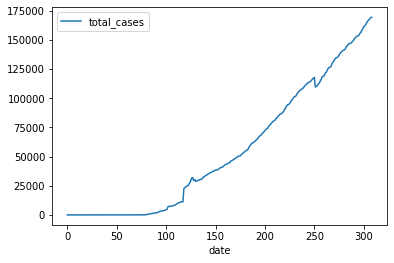

In [51]:
dataset.plot(x ='date', y='total_cases')

### Entrenamiento de Regresión Lineal

In [52]:

x = list(dataset.iloc [:, 0]) # Fecha
y = list(dataset.iloc [:, 1]) # Numero de casos
# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()
 


In [54]:
# Entrenamos nuestro modelo
regr.fit(np.array(x).reshape(-1, 1) ,y)



LinearRegression()

In [55]:
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio

Coefficients: 
 [580.86758941]
Independent term: 
 -34959.87090510494


### Probando el modelo

Predeciremos cuantos casos de covid habrán el día 365 y veremos si el resultado tiene lógica frente a los obtenidos ya anteriormente

In [61]:
y_prediccion = regr.predict([[315]])
print("El número de infectados el 10 de noviembre del 2020 será: ", int(y_prediccion))

y_prediccion = regr.predict([[336]])
print("El número de infectados el 1 de diciembre del 2020 será: ", int(y_prediccion))

El número de infectados el 10 de noviembre del 2020 será:  148013
El número de infectados el 1 de diciembre del 2020 será:  160211


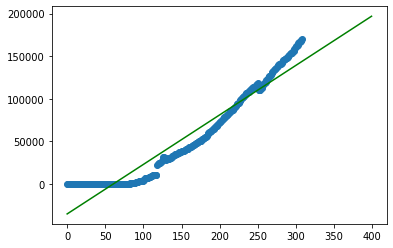

In [62]:
#Graficar
plt.scatter(x, y)
x_real = np.array(range(0, 400))
#print(x_real)
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='green')
plt.show()

# Curados

### Dataset utilizado: este dataset esta tomando de Johns Hopkins University Center for Systems Science and Engineering

In [66]:
# Carga del dataset
dataset = pd.read_csv('datasetcovid2.csv')
dataset

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0
...,...,...,...,...,...
54145,2020-10-28,Zimbabwe,8320,7845,242
54146,2020-10-29,Zimbabwe,8349,7864,242
54147,2020-10-30,Zimbabwe,8362,7884,242
54148,2020-10-31,Zimbabwe,8367,7894,243


### Seleccionamiento: 
En este caso se toma los datos de las fechas y el número de recuperados de coronavirus en Ecuador desde la fecha 0 hasta el presente 
mes.


In [67]:
dataset = dataset[dataset['Country'].isin(['Ecuador'])] #Filtro la Informacion solo para Ecuador
dataset = dataset.loc[:,['Date','Recovered']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = dataset['Date']
dataset['Date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-22", FMT)).days)

dataset

,Date,Recovered
14820,0,0
14821,1,0
14822,2,0
14823,3,0
14824,4,0
...,...,...
15100,280,141759
15101,281,141759
15102,282,141759
15103,283,141759


### Gráfica de los datos

<AxesSubplot:xlabel='Date'>

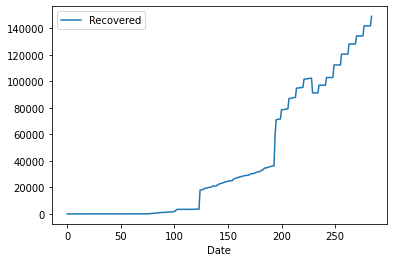

In [68]:
dataset.plot(x ='Date', y='Recovered')

### Entrenamiento y aplicación de regresión lineal

In [69]:
x = list(dataset.iloc [:, 0]) # Fecha
y = list(dataset.iloc [:, 1]) # Numero de casos
# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()
 

In [71]:
# Entrenamos nuestro modelo
regr.fit(np.array(x).reshape(-1, 1) ,y)


LinearRegression()

In [72]:
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio

Coefficients: 
 [526.82761331]
Independent term: 
 -34097.67196662989


In [74]:
y_prediccion = regr.predict([[293]])
print("El número de recuperados a la fecha de 10 de noviembre de 2020 será:", int(y_prediccion))

y_prediccion = regr.predict([[314]])
print("El número de recuperados a la fecha de 1 de diciembre de 2020 será: ", int(y_prediccion))

El número de recuperados a la fecha de 10 de noviembre de 2020 será: 120262
El número de recuperados a la fecha de 1 de diciembre de 2020 será:  131326


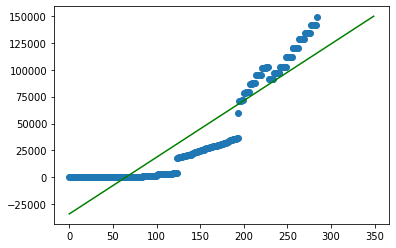

In [76]:
#Graficar
plt.scatter(x, y)
x_real = np.array(range(0, 350))
#print(x_real)
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='green')
plt.show()

### Resultados:
La comparación nos deja que:
- Para el 1 de Diciembre habrá 160211 personas infectadas de covid 19 en Ecuador
- Al mismo tiempo para el 1 de Diciembre habrá 131326 personas recuperadas de covid 19 en Ecuador

Los datos estan basados en históricos hasta los primeros días de noviembre.